<a href="https://colab.research.google.com/github/tauqirwaqar19/FDS_CreditCardFraud/blob/main/FDS_025_217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#Packages related to data visualizaiton

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#Setting plot sizes and type of plot
plt.rc("font", size=15)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(14,8))
plt.gray()


<Figure size 1008x576 with 0 Axes>

In [18]:
#Importing the Dataset

data=pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
# Understanding the Dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
#Understanding the Data 

total = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])

fraud_perc = round(fraudulent/normal*100, 2)
print('Total Trnsactions : ', total)
print('Normal Transactions : ', normal)
print('Fraudulent Transactions :', fraudulent)
print('Percentage of fraud Transactions is :', fraud_perc)

Total Trnsactions :  284807
Normal Transactions :  284315
Fraudulent Transactions : 492
Percentage of fraud Transactions is : 0.17


Distribution of Tranaction (Fraud/Normal): ((492, 31), (284315, 31))


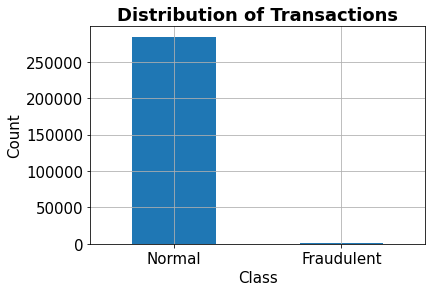

In [21]:
#Exploratory Data Analysis

fraudulent = data[data['Class']==1]
normal = data[data['Class']==0]
print('Distribution of Tranaction (Fraud/Normal):', (fraudulent.shape,normal.shape))

labels = ["Normal", "Fraudulent"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Distribution of Transactions",weight='bold')
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()


In [22]:

print(data.describe())


                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


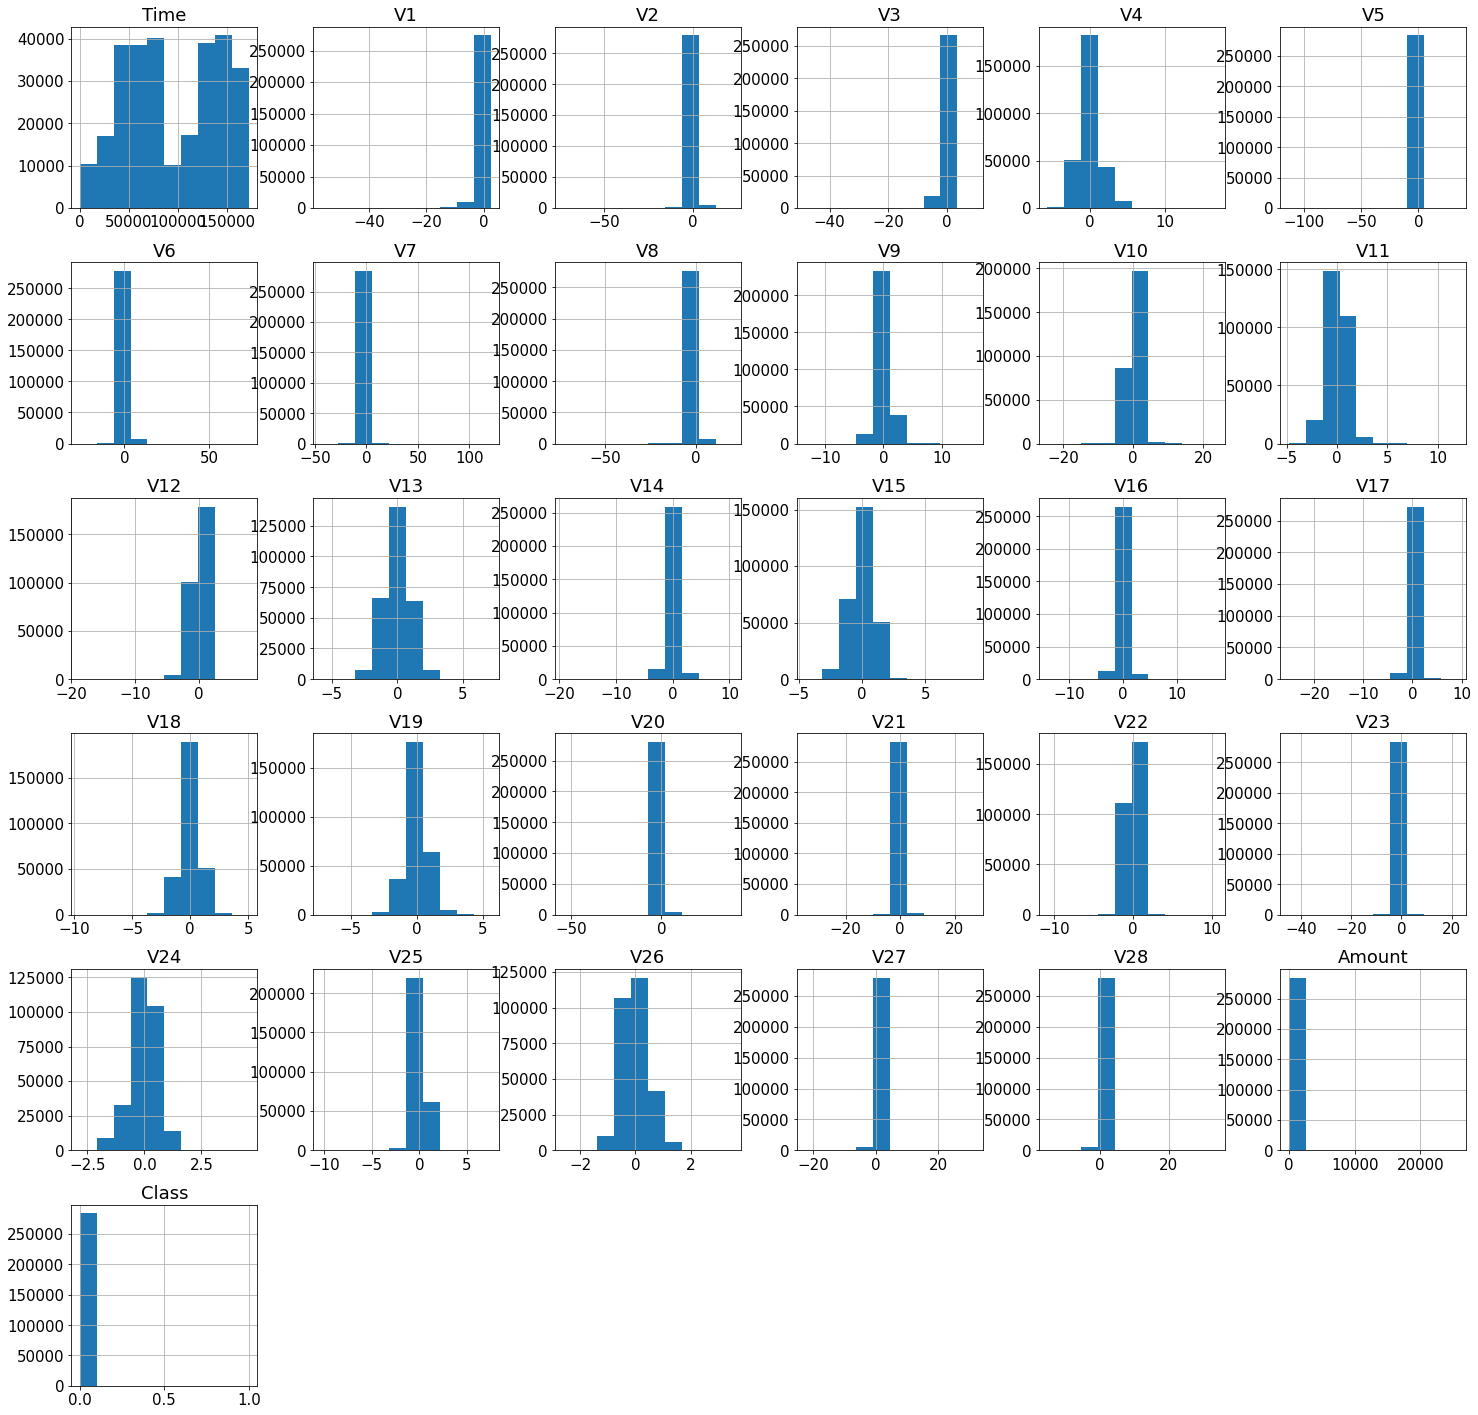

In [23]:
# distribution of features 
data.hist(figsize = (25, 25))
plt.show()

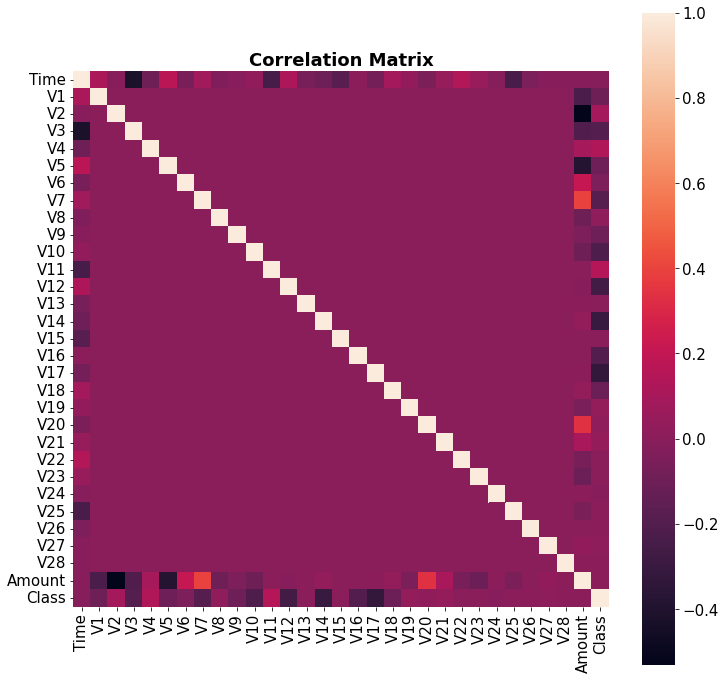

In [24]:
#correlation of features  
corrmat = data.corr()
fig = plt.figure(figsize = (12, 12))

sns.heatmap(corrmat, vmax = 1, square = True)
plt.title('Correlation Matrix',weight='bold')
plt.show()

In [ ]:
#Analysing Normal Transaction Amount
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
#Analysing Fradulent Transaction Amount
fraudulent.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [25]:
#Data Preprocessing
#Standardization of Amount 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
amt = data['Amount'].values
data['Amount'] = scaler.fit_transform(amt.reshape(-1, 1))
#Dropping Time Variable
data.drop(['Time'], axis=1, inplace=True)
#Dropping Duplicate Variables
data.drop_duplicates(inplace=True)
print('Dataset after Preprocessing:')
print(data.shape)


Dataset after Preprocessing:
(275663, 30)


In [ ]:
#Splitting Dataset
x = data.drop('Class', axis = 1).values
y = data['Class'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)


Model: Logistic Regression
 Accuracy score : 0.9989552498694062
 F1 score : 0.6666666666666666


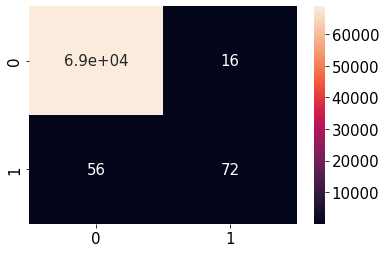

In [ ]:
#Building the Model

#Logistic Regression
lrg = LogisticRegression()
lrg.fit(x_train, y_train)
pred_lrg = lrg.predict(x_test)
#Evaluating Logistic Regression using accuracy and F1 score
print('Model: Logistic Regression')
print(' Accuracy score :',(accuracy_score(y_test, pred_lrg)))
print(' F1 score :', (f1_score(y_test, pred_lrg)))

#Confusion Matrix
CM=confusion_matrix(y_test,pred_lrg)
sns.heatmap(CM, annot=True)

Model: K- Nearest Neighbour
 Accuracy score :  0.999288989494457
 F1 score : 0.7949790794979079


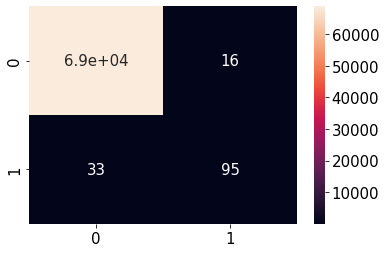

In [ ]:
#K-Nearest Neigbours 
n = 7
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
#Evaluating KNN using accuracy and F1 score
print('Model: K- Nearest Neighbour')
print(' Accuracy score : ',(accuracy_score(y_test, pred_knn)))
print(' F1 score :', (f1_score(y_test, pred_knn)))
#Confusion Matrix
CM=confusion_matrix(y_test,pred_knn)
sns.heatmap(CM, annot=True)

Model: Decision Tree
 Accuracy score :  0.9991438853096524
 F1 score : 0.7489361702127659


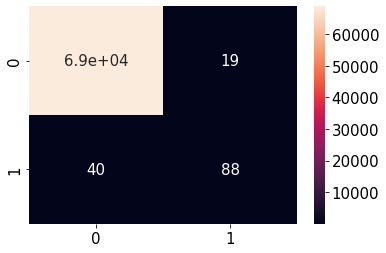

In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
#Evaluating Decision Tree using accuracy and F1 score
print('Model: Decision Tree')
print(' Accuracy score : ',(accuracy_score(y_test,pred_dt)))
print(' F1 score :', (f1_score(y_test, pred_dt)))
#Confusion Matrix
CM=confusion_matrix(y_test,pred_dt)
sns.heatmap(CM, annot=True)


Model: Naive Bayes
Accuracy score :  0.9777700388879216
F1 score : 0.11649365628604383


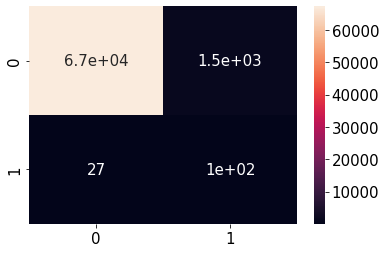

In [ ]:
# Naive Bayes
nb = GaussianNB() # get instance of model
nb.fit(x_train, y_train) # Train/Fit model 
pred_nb = nb.predict(x_test)
#Evaluating Naive Bayes using accuracy and F1 score
print('Model: Naive Bayes')
print('Accuracy score : ',(accuracy_score(y_test,pred_nb )))
print('F1 score :', (f1_score(y_test,pred_nb)))
#Confusion Matrix
CM=confusion_matrix(y_test,pred_nb)
sns.heatmap(CM, annot=True)

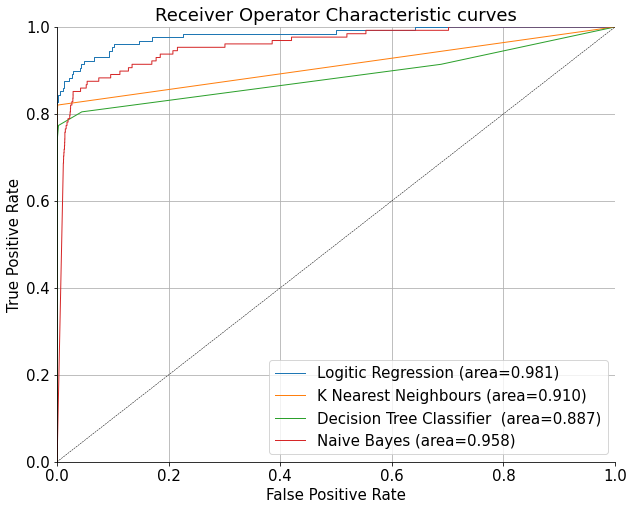

In [ ]:
# Plotting ROC curve
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(10,8))


roc_auc_plot(y_test,lr.predict_proba(x_test),label='Logitic Regression',l='-')
roc_auc_plot(y_test,knn.predict_proba(x_test),label='K Nearest Neighbours',l='-')
roc_auc_plot(y_test,dt.predict_proba(x_test),label='Decision Tree Classifier ',l='-')
roc_auc_plot(y_test,nb.predict_proba(x_test),label='Naive Bayes',l='-')



ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')#
sns.despine()